# Modeling of the Car Data



## Overview of Steps:

- **Choose Modeling Techniques:** Both of our target features (price and sales time) are "continuous" variables and hence we need regression techniques. We start by selecting a Linear Regression and Random Forest Regression model.

- **Build the Model:** Using the preprocessed datasets, we construct the models. For Random Forest Regression we use all the features and for Linear Regression we only use the numerical features from the processed data.

- **Set Appropriate Error Metrics:** To accurately assess the models' performance, we establish relevant error metrics. We choose the mean absolute error since it tells us the "true" differences between predicted prices/sales times and real prices/sales times.

- **Evaluate the Results:** Once the models are built, we shortly evaluate their performance using suitable metrics. This evaluation helps in understanding how well our models are performing.

- **Visualize the Results:** We visualize the results using scatter plots for the deviations of predicted prices and sales times. This visualization aids in interpreting the models' performance and in making data-driven decisions.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's read the cleaned datafile

import warnings
warnings.filterwarnings('ignore', message="^Columns.*")
warnings.simplefilter(action='ignore', category=FutureWarning)
df = pd.read_csv("used_cars_cleaned.csv") 

# Linear regression

## Target Variables
- **Price:** Our primary target variable for prediction.
- **Days on Market:** A secondary target to understand how long a vehicle stays on the market.

## Predicting feature price

We note that since in our linear regression model there are no hyperparameters to tune we don't need to split the train data into train data and validation data. In other words, it is sufficient to use train-test split only once.

In [3]:
# Choose the numerical features for linear regression model
numerical_features = ['combine_fuel_economy', 'daysonmarket', 'engine_displacement', 'horsepower', 'legroom', 'major_options', 'mileage', 
                       'price', 'savings_amount', 'seller_rating', 'size',  'torque', 'year']

df_linear = df[numerical_features]
df_linear

,combine_fuel_economy,daysonmarket,engine_displacement,horsepower,legroom,major_options,mileage,price,savings_amount,seller_rating,size,torque,year
0,31.50000,55,1500.0,160.0,80.1,14.0,42394.0,14639.0,1749,3.447761,814911.040,184.000000,2018
1,22.50000,83,3600.0,310.0,79.4,19.0,29695.0,26343.0,1685,3.447761,1135326.586,266.000000,2018
2,26.08331,76,2400.0,182.0,81.1,13.0,31232.0,16224.0,1836,3.447761,943577.950,172.000000,2017
3,27.50000,16,2400.0,180.0,76.3,10.0,35392.0,14849.0,1652,3.447761,881898.140,175.000000,2016
4,26.08331,84,2400.0,182.0,81.1,10.0,61421.0,12979.0,1687,3.447761,902731.450,272.000000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699343,29.00000,16,1500.0,170.0,80.6,4.0,41897.0,17998.0,381,4.272727,869386.024,265.218651,2018
1699344,22.50000,171,3600.0,310.0,79.4,6.0,5.0,36490.0,0,4.533333,1135326.586,266.000000,2020
1699345,26.08331,91,2000.0,240.0,82.6,3.0,57992.0,12990.0,462,4.142857,931625.990,270.000000,2016
1699346,35.00000,11,2000.0,180.0,76.5,5.0,27857.0,26998.0,849,4.272727,836891.691,318.000000,2017


In [4]:
# Choose the target value and independent features

x = df_linear.drop(columns = ["price", "daysonmarket"], axis = 1)
y_price = df_linear["price"]
y_days = df_linear["daysonmarket"]


In [5]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train_price, y_test_price = train_test_split(x, y_price, test_size=0.2, random_state=1550) 


# Scaling is not necessary for the linear model. After scaling we obtain exactly the same results than without scaling.
# But with scaling the importance of features (the coefficients for different features) change. 
# With scaling we can compare the different models more reliably even though we do not have exactly the same features.

stand = StandardScaler()
stand.fit(x_train)
x_train = stand.transform(x_train)
x_test = stand.transform(x_test)


In [6]:
# Build and fit the linear model 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

model_linear = LinearRegression()

model_linear.fit(x_train, y_train_price)

print("Mean absolute error in train data: ", mean_absolute_error(y_train_price, model_linear.predict(x_train)))

print("Model score (R^2 coefficient of determination) in train data: ", model_linear.score(x_train, y_train_price)) 


Mean absolute error in train data:  4479.831588713234
Model score (R^2 coefficient of determination) in train data:  0.6905411809075068


In [7]:
# Calculate the results for the model in test data

y_price_pred = model_linear.predict(x_test)

mae = mean_absolute_error(y_test_price, y_price_pred)
print("Mean absolute error in test data: ", mae)

print("Model score (R^2 coefficient of determination) in test data: ", model_linear.score(x_test, y_test_price)) 

print()

meanprice =  df_linear["price"].mean()
medianprice = df_linear["price"].median()

print(f"Average value of price in the dataset: {round(meanprice)}")
print(f"Median value of price in the dataset: {round(medianprice)}\n")

print(f"Relative mean absolute error with respect to average: {round(100*mae/meanprice, 1)} %")
print(f"Relative mean absolute error with respect to median: {round(100*mae/medianprice, 1)} %")

print()

mean_percentage_error = round(np.mean(np.abs((y_test_price - y_price_pred) / y_test_price)) * 100, 1)
print(f"Average of individual relative errors: {mean_percentage_error} %")

Mean absolute error in test data:  4481.869568719444
Model score (R^2 coefficient of determination) in test data:  0.6898823760546868

Average value of price in the dataset: 26498
Median value of price in the dataset: 24955

Relative mean absolute error with respect to average: 16.9 %
Relative mean absolute error with respect to median: 18.0 %

Average of individual relative errors: 18.6 %


In [8]:
# Coefficients give us the "importance of features" for linear model
coefficients = model_linear.coef_

features = df_linear.drop(["price", "daysonmarket"], axis = 1).columns
feature_importances = pd.DataFrame(columns = ["Coefficient"], index = features) 
for i in range(len(features)):
    feature_importances.loc[features[i], "Coefficient"] = round(coefficients[i])

# Sort the coefficients with respect to absolute value since the dependence can be positively or negatively linear
feature_importances = feature_importances.sort_values(by="Coefficient", key = abs, ascending=False)

# Compare these to the feature importances of the random forest regressor in the evaluation phase 
# The first three features are the same (not in same order)
feature_importances

,Coefficient
horsepower,4608
year,3174
mileage,-2800
major_options,1128
torque,1088
size,920
savings_amount,-853
engine_displacement,-632
seller_rating,577
legroom,-277


### Conclusion:
The Linear Regression model exhibits a reasonable level of accuracy with an R^2 score that signifies a decent predictive power. However, the relative MAE indicates that there may be significant discrepancies between predicted and actual prices, especially when dealing with median price values. The average of individual relative errors further highlights the model's limitations in price prediction accuracy on an individual level.

The five most important features which affect the price the most are horsepower, year, mileage, major_options and torque. From these five features mileage gives negative contribution to the price which makes sense and the rest contribute positively to the price which also makes sense.

## Predictions Visualization
A scatter plot visualization represents the deviations of predicted prices from the actual prices. Each point indicates a predicted value's deviation, with the x-axis showing the predicted price and the y-axis representing the deviation from the actual price.

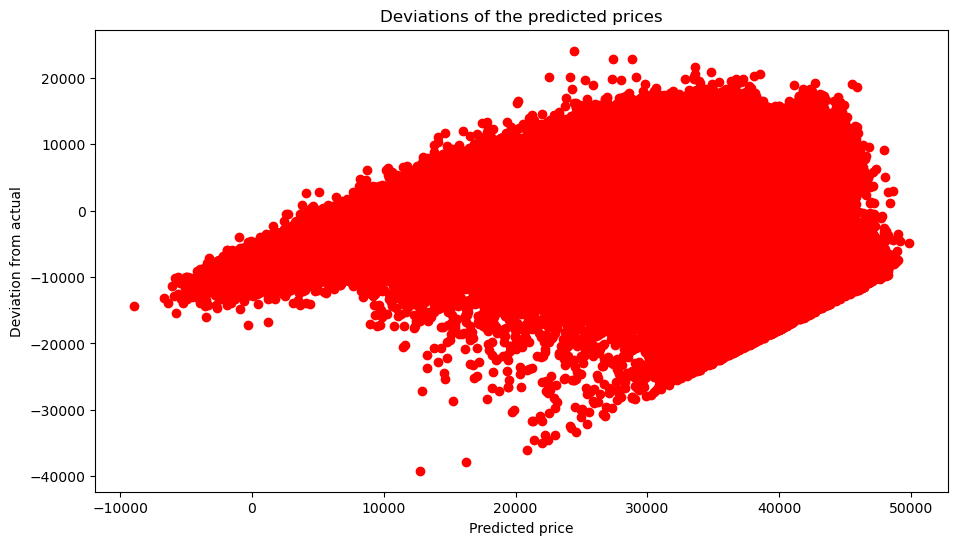

,price,Predicted price
103355,21397.0,23561.0
8985,21999.0,33210.0
210026,20705.0,26354.0
15982,30995.0,28440.0
130553,55691.0,39185.0
304855,23000.0,21076.0
255648,27595.0,32791.0
197138,27670.0,28483.0
170225,17945.0,22322.0
52002,16990.0,15539.0


In [9]:
# Let's visualize the predictions of the linear model

plt.figure(figsize=(11, 6))

plt.scatter(y_price_pred, y_price_pred - y_test_price, color = "red")
plt.xlabel('Predicted price')
plt.ylabel('Deviation from actual')
plt.title("Deviations of the predicted prices")
plt.show()


df_predictions = pd.DataFrame(y_test_price).reset_index(drop = True)
df_predictions.insert(loc = 1, column = "Predicted price", value = y_price_pred.round())

# Let's print a random sample for the prices and predicted prices
df_predictions.sample(n = 20)

### Observations from the Scatter Plot:
- The plot shows a cone-shaped distribution of deviations, suggesting higher variability in the model's predictions for higher-priced vehicles.
- A clustering of points around the lower end of the predicted price range, indicating the model predicts lower-priced vehicles with less deviation.
- For high-priced vehicles, the deviations are more spread out, which could indicate that our model may not be capturing some factors that significantly affect higher vehicle prices.
- The presence of negative predicted `price` values suggests that the model is not adequately constrained to the realistic domain of the target variable, as negative values for `price` are not plausible.


## Predicting feature daysonmarket
In this section, we attempt to predict the number of days a vehicle stays on the market (`days on market`) using the same set of features previously utilized for price prediction. 

We note that since in our linear regression model there are no hyperparameters to tune we don't need to split the train data into train data and validation data. In other words, it is sufficient to use train-test split only once.

In [10]:
# Split the data and scale the data

x_train2, x_test2, y_train_days, y_test_days = train_test_split(x, y_days, test_size=0.2, random_state=1550)

stand2 = StandardScaler()
stand2.fit(x_train2)
x_train2 = stand.transform(x_train2)
x_test2 = stand.transform(x_test2)

In [11]:
# Build and fit the model 

model_linear2 = LinearRegression()

model_linear2.fit(x_train2, y_train_days)

print("Mean absolute error in train data: ", mean_absolute_error(y_train_days, model_linear2.predict(x_train2)))

print("Model score (R^2 coefficient of determination) in train data: ", model_linear2.score(x_train2, y_train_days)) 


Mean absolute error in train data:  48.032973692190495
Model score (R^2 coefficient of determination) in train data:  0.05504292629810725


In [12]:
# Calculate the results for the model in test data
# The results are very bad, but this is not surprising since we can see from the correlation matrix that there are no
# significant correlations between daysonmarket and other features

y_days_pred = model_linear2.predict(x_test2)

mae2 = mean_absolute_error(y_test_days, y_days_pred)
print("Mean absolute error: ", mae2)

print("Model score (R^2 coefficient of determination): ", model_linear2.score(x_test2, y_test_days)) 

print()

meandays =  df_linear["daysonmarket"].mean()
mediandays = df_linear["daysonmarket"].median()

print(f"Average value of daysonmarket in the dataset: {round(meandays)}")
print(f"Median value of daysonmarket in the dataset: {round(mediandays)} \n")

print(f"Relative mean absolute error with respect to average: {round(100*mae2/meandays, 1)} %")
print(f"Relative mean absolute error with respect to median: {round(100*mae2/mediandays, 1)} %")

# We do not calculate the average of individual relative errors since we would be dividing by zero in some cases

Mean absolute error:  48.143962955947046
Model score (R^2 coefficient of determination):  0.054452876707651976

Average value of daysonmarket in the dataset: 59
Median value of daysonmarket in the dataset: 34 

Relative mean absolute error with respect to average: 81.6 %
Relative mean absolute error with respect to median: 141.6 %


In [13]:
# Coefficients give us the "importance of features" for linear model
coefficients2 = model_linear2.coef_

features2 = df_linear.drop(["price", "daysonmarket"], axis = 1).columns
feature_importances2 = pd.DataFrame(columns = ["Coefficient"], index = features) 
for i in range(len(features2)):
    feature_importances2.loc[features2[i], "Coefficient"] = round(coefficients2[i], 1)

# Sort the coefficients with respect to absolute value since the dependence can be positively or negatively linear
feature_importances2 = feature_importances2.sort_values(by="Coefficient", key = abs, ascending=False)

# Compare these to the feature importances of the random forest regressor in the evaluation phase
# Savings amount and mileage seem to be important in both models
# Some of these coefficients are quite difficult to interpret: why for example greater mileage always decreases daysonmarket?
# Or why newer cars would always have greater daysonmarket value?
feature_importances2


,Coefficient
mileage,-7.8
combine_fuel_economy,-7.2
engine_displacement,-7.2
savings_amount,-6.3
torque,-2.5
horsepower,-2.0
major_options,-1.3
legroom,-1.2
year,1.2
size,1.1


### Conclusion:
The model's predictions for `days on market` are significantly inaccurate, with a high MAE and an extremely low R^2 score. This suggests that the features selected for the model do not have a strong correlation with the `days on market`, which is corroborated by the preliminary analysis of the correlation matrix.

The five most important features which affect the days on market the most are mileage, combine_fuel_economy, engine_displacement, savings_amount and torque. These five features all contribute negatively to the days on market. These contributions are not as clear as in the case of the feature price. For example, does mileage always contribute negatively to days on market (which means greater mileage -> shorter days on market)?

## Scatter Plot Analysis
The scatter plot illustrates the model's predictive errors for `days on market`. Each red dot signifies an individual prediction, where:
- The **x-axis** displays the predicted `days on market`.
- The **y-axis** shows the residual, or the difference between the predicted and actual `days on market` (predicted minus actual).

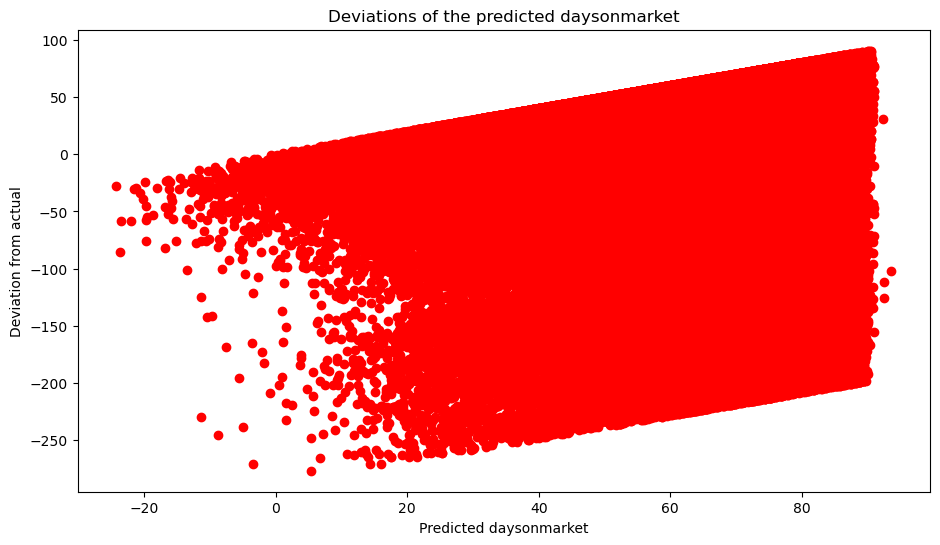

,daysonmarket,Predicted daysonmarket
191071,22,52.0
139967,6,70.0
10668,216,70.0
275670,80,75.0
217479,43,62.0
193740,23,82.0
165003,287,67.0
250225,14,18.0
102429,51,67.0
8999,18,71.0


In [14]:
# Let's visualize the predictions of the linear model

plt.figure(figsize=(11, 6))

plt.scatter(y_days_pred, y_days_pred - y_test_days, color = "red")
plt.xlabel('Predicted daysonmarket')
plt.ylabel('Deviation from actual')
plt.title("Deviations of the predicted daysonmarket")
plt.show()


df_predictions2 = pd.DataFrame(y_test_days).reset_index(drop = True)
df_predictions2.insert(loc = 1, column = "Predicted daysonmarket", value = y_days_pred.round())

# Let's print a random sample for the prices and predicted prices
df_predictions2.sample(n = 20)

### Key Observations:
- The graph shows a wide variance in predictions, particularly for vehicles with a lower number of `days on market`. This indicates the model may struggle with accurately predicting shorter market times.
- There's a noticeable cluster of points around the lower predicted values, suggesting more accurate predictions for vehicles with greater predicted `days on market`.
- The presence of negative predicted `days on market` values suggests that the model is not adequately constrained to the realistic domain of the target variable, as negative values for `days on market` are not plausible.

# Random Forest Regression

## Target Variables
- **Price:** Our primary target variable for prediction.
- **Days on Market:** A secondary target to understand how long a vehicle stays on the market.

## Predicting feature price

In [15]:
# Choose the target variable and independet variables
X = df.drop(columns = ["price", "daysonmarket"], axis = 1)
y1 = df["price"]
y2 = df["daysonmarket"]


In [16]:
# Split the data into train, validation and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=1550)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=1550)



In [17]:
# Perform data scaling using standardscaler
# Scaling is not necessary for tree-based models. After scaling we obtain nearly the same results than without scaling.

scaler_stand = StandardScaler()
scaler_stand.fit(X_train)
X_train = scaler_stand.transform(X_train)
X_valid = scaler_stand.transform(X_valid)
X_test = scaler_stand.transform(X_test)


In [18]:
# Build and fit the Random Forest Regression model
# Training the model takes a lot of time! Therefore we restrict to shallow forests.
# We could increase the amount of estimators and the depth of the tree but it would increase the training time a lot

from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators = 400, max_depth = 20, random_state=2100)

model_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=2100)

In [19]:
# Tune the hyperparameters n_estimators and max_depth using validation data, i.e. try to get best results in validation data
# Tuning the model takes so much time that in this case we do not run different models many times to obtain the best parameters

y_valid_pred = model_RF.predict(X_valid)

mae_valid = mean_absolute_error(y_valid, y_valid_pred)
print("Mean absolute error in validation data: ", mae_valid)
print("Model score (R^2 coefficient of determination) in validation data: ", round(model_RF.score(X_valid, y_valid), 2)) 

Mean absolute error in validation data:  1620.7960612163968
Model score (R^2 coefficient of determination) in validation data:  0.95


In [20]:
# Test the model in the test data after tuning the hyperparameters with validation data

y_test_pred = model_RF.predict(X_test)

mae_test = mean_absolute_error(y_test, y_test_pred)
print("Mean absolute error in test data: ", round(mae_test, 1))
print("Model score (R^2 coefficient of determination) in test data: ", round(model_RF.score(X_test, y_test), 2)) 
print()

meanprice =  df["price"].mean()
medianprice = df["price"].median()

print(f"Average value of price in the dataset: {round(meanprice)}")
print(f"Median value of price in the dataset: {round(medianprice)} \n")

print(f"Relative mean absolute error with respect to average: {round(100*mae_test/meanprice, 1)} %")
print(f"Relative mean absolute error with respect to median: {round(100*mae_test/medianprice, 1)} %")


print()

mean_percentage_error = round(np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100, 1)
print(f"Average of individual relative errors: {mean_percentage_error} %")



Mean absolute error in test data:  1617.3
Model score (R^2 coefficient of determination) in test data:  0.95

Average value of price in the dataset: 26498
Median value of price in the dataset: 24955 

Relative mean absolute error with respect to average: 6.1 %
Relative mean absolute error with respect to median: 6.5 %

Average of individual relative errors: 6.4 %


In [30]:
# Check the feature importances
# We could interpret these importances using the fact that the data is from US (horsepower is a very important feature)

importances = model_RF.feature_importances_
columns = df.drop(["price", "daysonmarket"], axis = 1).columns
feature_importances = pd.DataFrame(columns = ["Feature importance"], index = columns) 
for i in range(len(columns)):
    feature_importances.loc[columns[i], "Feature importance"] = round(importances[i]*100, 1)
feature_importances = feature_importances.sort_values(by="Feature importance", ascending=False)

feature_importances["Feature importance"] = feature_importances["Feature importance"].apply(lambda x: f"{x} %")

# Compare these to the coefficients of the linear model
feature_importances

,Feature importance
year,34.4 %
horsepower,33.6 %
mileage,5.9 %
make_name,4.4 %
size,3.9 %
torque,3.0 %
wheel_system,2.9 %
model_name,2.8 %
legroom,1.5 %
major_options,1.4 %


### Conclusion:
The Random Forest Regression model has proven to be highly effective in predicting vehicle prices, as evidenced by the low MAE and the high R^2 score. The errors relative to both the average and median prices are modest, suggesting that the model's predictions are generally reliable and precise.

The five most important features which affect the price the most are year, horsepower, mileage, make_name and size. This time we do not know whether the contributions are negative or positive as in the case of linear regression. Year, horsepower and mileage seem to be important to both models.

## Deviation Scatter Plot
The plot shows each prediction's deviation from the actual price, providing a clear view of the model's accuracy across different price ranges.


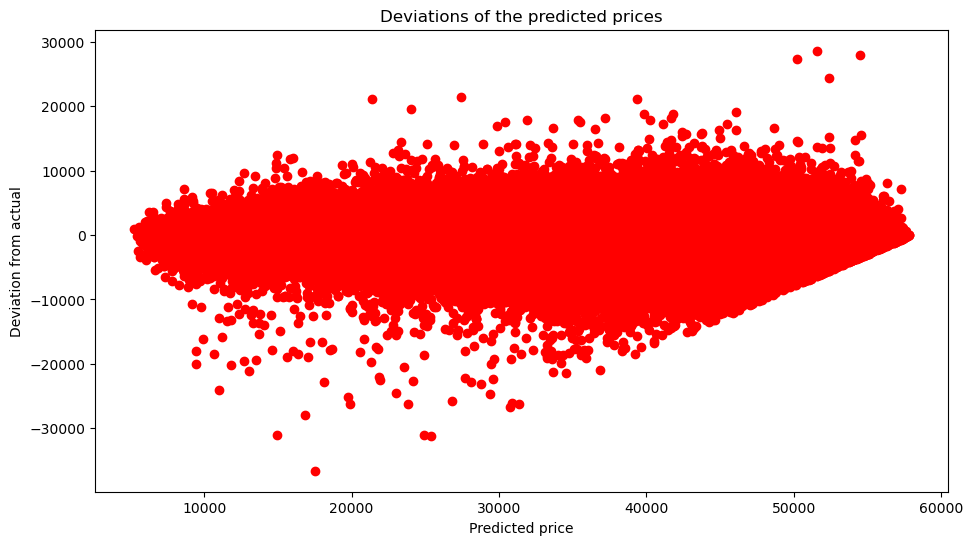

,price,Predicted price
171779,21551.0,20697.0
160736,17000.0,21046.0
24561,15979.0,16123.0
303503,22406.0,24610.0
146752,31270.0,27465.0
2478,17998.0,16400.0
307238,16183.0,15630.0
183558,22000.0,22120.0
212703,8300.0,9347.0
64147,17146.0,15710.0


In [22]:
# We can also visualize the predictions and deviations from real values

df_forest = pd.DataFrame(y_test).reset_index(drop = True)
df_forest.insert(loc = 1, column = "Predicted price", value = y_test_pred.round())

plt.figure(figsize=(11, 6))

plt.scatter(y_test_pred, y_test_pred - y_test, color = "red")
plt.xlabel('Predicted price')
plt.ylabel('Deviation from actual')
plt.title("Deviations of the predicted prices")
plt.show()

# Let's print a random sample for the prices and predicted prices
df_forest.sample(n= 20)


### Key Observations:
- **Close Predictions:** Some predictions are very close to the actual prices, with minor deviations, demonstrating the model's accuracy for those instances.
- **Range of Deviations:** The sample displays a range of deviations, from slight to more pronounced, reflecting the variability in the model's performance.
- **High-value Predictions:** The model seems to maintain its performance even for higher-value vehicles, which can be challenging to predict due to the complexity of factors that drive higher prices.


## Predicting feature daysonmarket
In this section, we attempt to predict the number of days a vehicle stays on the market (`days on market`) using the same set of features previously utilized for price prediction.

In [23]:
# Split the data and perform scaling (scaling is not necessary for tree-based models)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y2, test_size=0.2, random_state=1550)

X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train2, y_train2, test_size=0.2, random_state=1550)

scaler_stand2 = StandardScaler()
scaler_stand2.fit(X_train2)
X_train2 = scaler_stand2.transform(X_train2)
X_valid2 = scaler_stand2.transform(X_valid2)
X_test2 = scaler_stand2.transform(X_test2)


In [24]:
# Build and fit the Random Forest Regression model

from sklearn.ensemble import RandomForestRegressor

model_RF2 = RandomForestRegressor(n_estimators = 400, max_depth = 20, random_state=2100)  

model_RF2.fit(X_train2, y_train2)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=2100)

In [25]:
# Tune the hyperparameters n_estimators and max_depth using validation data, i.e. try to get best results in validation data

y_valid_pred2 = model_RF2.predict(X_valid2)

mae_valid2 = mean_absolute_error(y_valid2, y_valid_pred2)
print("Mean absolute error in validation data: ", round(mae_valid2, 1))
print("Model score (R^2 coefficient of determination) in validation data: ", round(model_RF2.score(X_valid2, y_valid2), 2)) 

Mean absolute error in validation data:  38.0
Model score (R^2 coefficient of determination) in validation data:  0.34


In [26]:
# Test the model in the test data after tuning the hyperparameters with validation data

y_test_pred2 = model_RF2.predict(X_test2)

mae_test2 = mean_absolute_error(y_test2, y_test_pred2)
print("Mean absolute error in test data: ", round(mae_test2, 1))
print("Model score (R^2 coefficient of determination) in test data: ", round(model_RF2.score(X_test2, y_test2), 2)) 
print()

meandays =  df["daysonmarket"].mean()
mediandays = df["daysonmarket"].median()

print(f"Average value of daysonmarket in the dataset: {round(meandays)}")
print(f"Median value of daysonmarket in the dataset: {round(mediandays)} \n")

print(f"Relative mean absolute error with respect to average: {round(100*mae_test2/meandays, 1)} %")
print(f"Relative mean absolute error with respect to median: {round(100*mae_test2/mediandays, 1)} %")

# We do not calculate the average of individual relative errors since we would be dividing by zero in some cases

Mean absolute error in test data:  38.0
Model score (R^2 coefficient of determination) in test data:  0.34

Average value of daysonmarket in the dataset: 59
Median value of daysonmarket in the dataset: 34 

Relative mean absolute error with respect to average: 64.4 %
Relative mean absolute error with respect to median: 111.8 %


In [31]:
# Check the feature importances

importances2 = model_RF2.feature_importances_
columns2 = df.drop(["price", "daysonmarket"], axis = 1).columns
feature_importances2 = pd.DataFrame(columns = ["Feature importance"], index = columns2) 
for i in range(len(columns2)):
    feature_importances2.loc[columns2[i], "Feature importance"] = round(importances2[i]*100, 1)
feature_importances2 = feature_importances2.sort_values(by="Feature importance", ascending=False)

feature_importances2["Feature importance"] = feature_importances2["Feature importance"].apply(lambda x: f"{x} %")

# Compare these to the coefficients of the linear model
feature_importances2

,Feature importance
savings_amount,15.0 %
mileage,12.9 %
seller_rating,12.4 %
year,11.4 %
major_options,7.0 %
horsepower,5.3 %
make_name,4.8 %
interior_color,4.7 %
combine_fuel_economy,4.2 %
size,4.1 %


### Conclusion:
These metrics indicate that while the model has learned some patterns, it is not highly accurate in predicting `days on market`. The high relative MAE values, both against the average and the median, show that the model's predictions can be substantially different from the actual values.

The five most important features which affect the days on market the most are savings_amount, mileage, seller_rating, year and major_options. This time we do not know whether the contributions are negative or positive as in the case of linear regression. Savings amount and mileage seem to be important to both models.

## Scatter Plot Analysis
The scatter plot illustrates the model's predictive errors for `days on market`. Each red dot signifies an individual prediction, where:
- The **x-axis** displays the predicted `days on market`.
- The **y-axis** shows the residual, or the difference between the predicted and actual `days on market` (predicted minus actual).

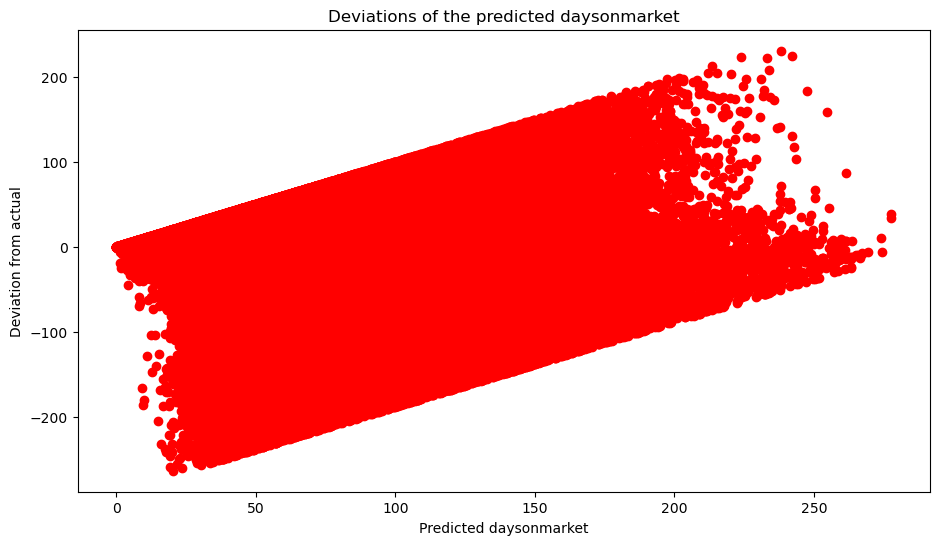

,daysonmarket,Predicted daysonmarket
272573,21,73.0
298252,187,131.0
329608,35,114.0
274408,13,78.0
166547,7,39.0
100422,194,178.0
90038,195,131.0
67492,3,42.0
170444,6,18.0
257483,28,31.0


In [28]:
# We can also visualize the predictions and deviations from real values

df_forest2 = pd.DataFrame(y_test2).reset_index(drop = True)
df_forest2.insert(loc = 1, column = "Predicted daysonmarket", value = y_test_pred2.round())

plt.figure(figsize=(11, 6))

plt.scatter(y_test_pred2, y_test_pred2 - y_test2, color = "red")
plt.xlabel('Predicted daysonmarket')
plt.ylabel('Deviation from actual')
plt.title("Deviations of the predicted daysonmarket")
plt.show()

# Let's print a random sample for the prices and predicted prices
df_forest2.sample(n= 20)

### Key Observations:
- **Spread of Predictions:** There is a wide spread in the deviations, especially for vehicles with a shorter predicted `days on market`. The predictions tend to be less accurate as the `days on market` decreases.
- **Trend of Overestimation:** The model shows a tendency to overestimate the `days on market` for vehicles with greater days and underestimate for those with fewer days, as seen by the distribution of data points around the zero deviation line.
- **Negative Deviations:** Negative values for deviations indicate instances where the actual `days on market` is greater than predicted, which is a common occurrence for vehicles with a fewer number of days on the market.